Currently using mps device
Setting weight with value: -9999, at coordinate: (2, 2)
tensor([[    0.,     0.,     0.,     0.,     0.],
        [    0.,     0.,     0.,     0.,     0.],
        [    0.,     0., -9999.,     0.,     0.],
        [    0.,     0.,     0.,     0.,     0.],
        [    0.,     0.,     0.,     0.,     0.]])
Current Epoch: 0
Starting Position: tensor([4.5000, 4.5000], device='mps:0')
<class 'torch.Tensor'>
tensor(True, device='mps:0')
tensor([4.5000, 4.5000], device='mps:0') -> tensor([4.7275, 4.6553], device='mps:0', grad_fn=<AddBackward0>), action: tensor([0.2275, 0.1553], device='mps:0', grad_fn=<TanhBackward0>)
tensor(False, device='mps:0')
tensor([4.7275, 4.6553], device='mps:0', grad_fn=<AddBackward0>) -> tensor([4.4588, 5.1898], device='mps:0', grad_fn=<AddBackward0>), action: tensor([-0.2687,  0.5345], device='mps:0', grad_fn=<TanhBackward0>)
Entered invalid position, breaking epoch 1.
Current Epoch: 1
Starting Position: tensor([4.5000, 4.5000], device='

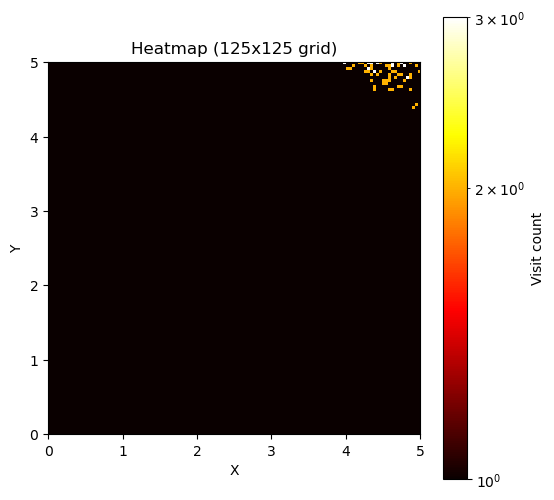

[2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

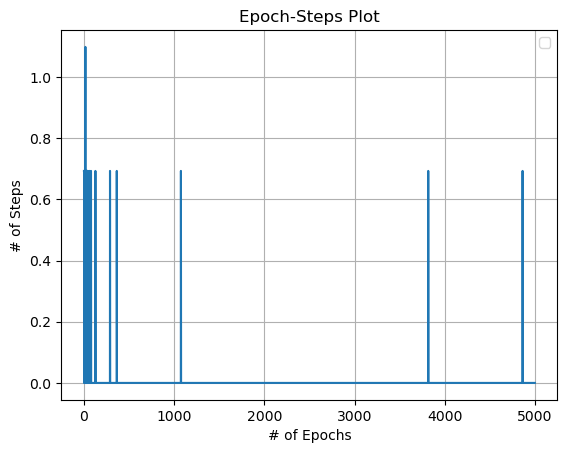

In [2]:
import torch
import cql.environment as env
import cql.nn.model as model
import cql.plotting.plotting as plot

max_epochs = 5000
max_episodes = 2000

training_batch_size = 64
learning_rate = 0.001
discount_factor = 0.99
exploration_probability = 0.1
exploration_discount = 0.99

critic_training_step = 1
actor_training_step = 1

# Weight parameters for the reward function
# [0] -> X_Difference
# [1] -> Y_Difference
# [2] -> Area_Reward
# [3] -> Boundary_Constraint
# [4] -> Goal_Reward
weight_params = [-5.0, -5.0, -5.0, 200.0, 20.0]

starting_pos = (4.5, 4.5)
target_pos = (0.5, 0.5)
env_dim = (5, 5)
env_obs = [((2, 2), -9999),]

goal_radius = 0.2

device = torch.device("mps")
print(f"Currently using {device} device")

e = env.Environment(
    dim=env_dim, 
    device=device,
    target_pos=target_pos, 
    start_pos=starting_pos)
e.set_weights(env_obs)
e.display()

weights = torch.tensor(weight_params, dtype=torch.float).to(device)
paths, epochs = model.run_sim(
    environment=e, 
    weights=weights,
    device=device,
    learning_rate=learning_rate,
    discount_factor=discount_factor,
    max_epochs=max_epochs,
    max_episodes=max_episodes,
    training_batch_size=training_batch_size,
    critic_training_step=critic_training_step,
    actor_training_step=actor_training_step
)
plot.plot_heatmap(paths=paths, heatmap_dim=5, bins=125)
lengths = [len(path) for path in paths]
print(lengths)

plot.plot_epochs(epochs, lengths)